<a href="https://colab.research.google.com/github/Osval-13/COM300_Practica_N-1/blob/main/Pr%C3%A1ctico01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CÁLCULO DE DATOS**

**Universitario:** Pinto Barron Osvaldo Dennis.
**Carrera:** Ingeniería en diseño y animación digital.

1.- Importación de librerías


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import csv
from sklearn.metrics import mean_squared_error

2.- Generar aleatoriamente los datos de estatura y peso con valores controlados

In [92]:
def generar_datos():
    datos = []
    for _ in range(100):
        while True:
            estatura = round(random.uniform(1.4, 2.0), 2)  # Estatura en metros
            peso = round(random.uniform(40, 100), 1)  # Peso en kilogramos

            # Control de valores aleatorios
            if 1.4 <= estatura < 1.6 and 40 <= peso < 60: # Estatura menor de 1,6 m con un peso entre 40 y 59 kg
                datos.append((estatura, peso)) # Lo guardamos en el vector de datos
                break
            elif 1.6 <= estatura < 1.8 and 50 <= peso < 70:  # Estatura menor de 1,8 m con un peso entre 50 y 69 kg
                datos.append((estatura, peso))
                break
            elif 1.8 <= estatura < 2.0 and 60 <= peso < 100: # Estatura menor de 2 m con un peso entre 60 y 99 kg
                datos.append((estatura, peso))
                break

    return datos

3.- Guardar los datos dentro de un archivo csv

In [93]:
datos = generar_datos()
with open('datos.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Estatura (m)", "Peso (kg)"])
    writer.writerows(datos)

4.- Cargamos los datos desde el archivo anteriormente creado

In [94]:
datos = pd.read_csv('datos.csv')
estatura = datos['Estatura (m)'].values
peso = datos['Peso (kg)'].values

5.- Imprimos los datos

In [95]:
# Verificamos los primeros 10 resultados
print(datos.head(10))

   Estatura (m)  Peso (kg)
0          1.84       77.7
1          1.82       97.3
2          1.64       55.4
3          1.72       65.4
4          1.53       56.8
5          1.68       67.2
6          1.43       40.2
7          1.76       53.6
8          1.55       42.8
9          1.89       83.7


6.- Calculamos la pendiente "m" y la ordenada de origen "b"

In [96]:
N = len(estatura)
sum_x = np.sum(estatura)
sum_y = np.sum(peso)
sum_xy = np.sum(estatura * peso)
sum_x2 = np.sum(estatura ** 2)

# Usamos la fórmula de la pendiente "a" y de la ordenada de origen "b"
pendiente = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
ordenada = (sum_y * sum_x2 - sum_x * sum_xy) / (N * sum_x2 - sum_x ** 2)

7.- Imprimos los resultados y realizamos el cálculo la regresión lineal

In [97]:
print(f'Pendiente: {pendiente}')
print(f'Ordenada al origen: {ordenada}')

# Fórmula de regresión lineal
# y = m * x + b
peso_y = pendiente * estatura + ordenada

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(peso, peso_y)
print(f'Error Cuadrático Medio: {mse}')

Pendiente: 79.9570977089284
Ordenada al origen: -71.89283051919506
Error Cuadrático Medio: 83.20635606790651


8.- Graficamos los datos y la línea de regresión

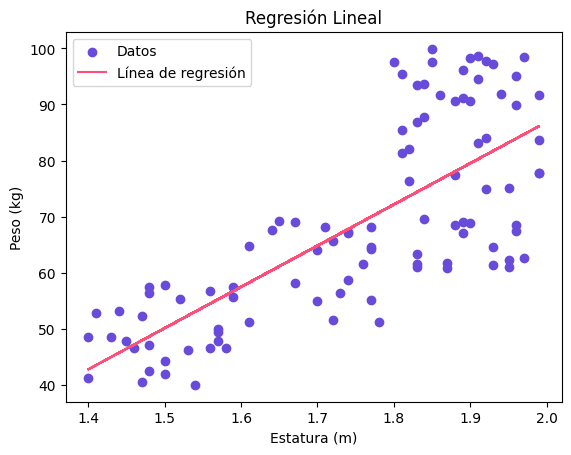

In [100]:
# Cambiamos los colores a hexadesimales
plt.scatter(estatura, peso, color='#694BDB', label='Datos')
plt.plot(estatura, peso_y, color='#FF4F79', label='Línea de regresión')
plt.xlabel('Estatura (m)')
plt.ylabel('Peso (kg)')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

# OTRO MÉTODO UTILIZANDO DATOS APROXIMADOS A LA REALIDAD

     Height     Weight
0  1.624724  59.742075
1  1.970429  86.162219
2  1.839196  76.476517
3  1.759195  61.681990
4  1.493611  49.315986


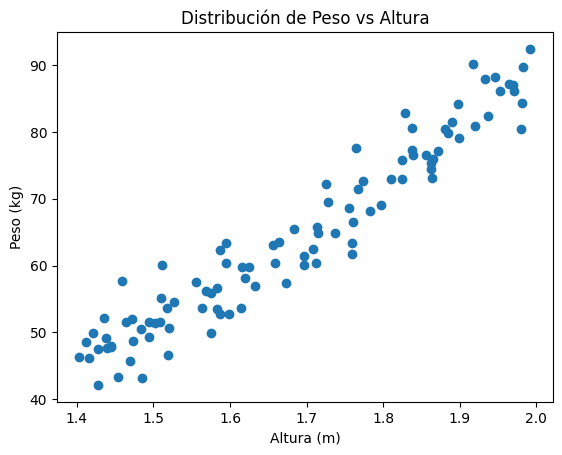

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generar 100 alturas entre 1.4 y 2.0 metros
heights = np.random.uniform(1.4, 2.0, 100)

# Generar pesos basados en una relación realista con la altura
weights = 22.5 * heights**2 + np.random.normal(0, 4, 100)  # Fórmula BMI modificada

# Crear un DataFrame para almacenar los datos
data = pd.DataFrame({'Height': heights, 'Weight': weights})

# Mostrar los primeros 5 ejemplos
print(data.head())

# Graficar los datos
plt.scatter(data['Height'], data['Weight'])
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Distribución de Peso vs Altura')
plt.show()

Pendiente (m): 73.81410903410874
Ordenada al origen (b): -59.794478042132354
Error Cuadrático Medio (MSE): 14.098910404155626


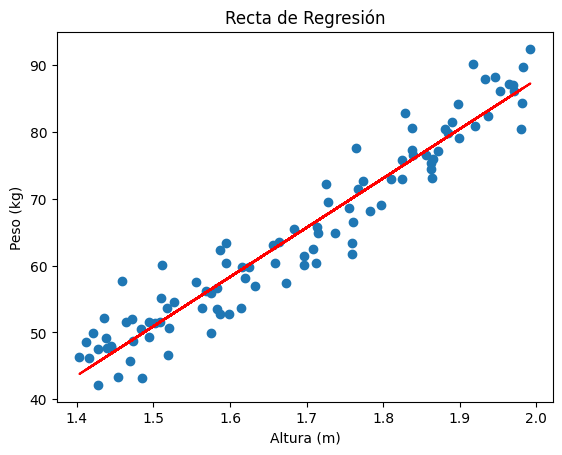

In [102]:
# Calcular la pendiente (m) y la ordenada al origen (b)
X = data['Height']
Y = data['Weight']

# Calculando los valores de m y b
m = np.cov(X, Y)[0, 1] / np.var(X)
b = np.mean(Y) - m * np.mean(X)

# Mostrar m y b
print(f"Pendiente (m): {m}")
print(f"Ordenada al origen (b): {b}")

# Predecir valores de Y
Y_pred = m * X + b

# Calcular el error cuadrático medio (MSE)
mse = np.mean((Y - Y_pred)**2)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Graficar la recta de regresión
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Recta de Regresión')
plt.show()